# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.2.Data Transformation](#3.2)
    * [4.3.Categorical Data Transformation](#3.2)  

# 1. Problem Definition

The goal of this case study is to help parking service providers identify high quality facilities and low quality facilities. The facilities flagged as low quality will be studid and I will try to identify features that are responsible for low quality

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

<a id='1.2'></a>
## 2.2. Loading the Data

In [2]:
# Load Dataset
df = pd.read_csv('../data/raw/Parking_Facility_Data.csv')
df.shape

(694, 51)

In [3]:
# peek data
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 51)
df.head()

,facility_id,reporting_neighborhood,city,latitude,longitude,height_restriction,ext_allowed,parking_type,accessible,ev_charging,heated,rooftop_exposed,has_monthly_rates,has_transient_rates,p4w_total_gross_revenue,p4w_new_drivers,p4w_repeat_drivers,num_words_parking_instruction,num_rentals_refunded,p4w_sipp,sipp,user_issues_per_park,tipp,product_cpp,total_cpp,p4w_lot_full,num_stalls,count_first_rentals,count_repeat,rental_count,p4w_return_pct,scan_to_pay_flag,iq_facility,p4w_total_gross_revenue_no_event,customer_reviews_count,covered_parking,inout_allowed,lot_fulls_per_park,utilization,utilization_weekday_day,utilization_weekend_night,has_event_rates,searches,on_site_staff,facility_type_under_el,facility_type_garage,facility_type_valet_stand,facility_type_lot,facility_type_personal_spot,refund_pct,average_star_rating
0,1,United Center,Chicago,41.882218,-87.667749,NaN,True,self,True,False,False,False,False,True,90.0,5.0,1.0,55,1,0.000,0,0,0,0,0,0,1,2,2,7,16.7%,False,False,0.0,4,False,True,0,0.0225,0.0098,0.0962,True,1002,False,0,0,0,1,0,14.29%,5.0
1,2,Lincoln Park,Chicago,41.922214,-87.654810,NaN,True,self,False,False,False,False,False,True,263.5,13.0,2.0,74,1,0.000,1000,0,0,0,1000,0,1,1,1,16,13.3%,False,True,263.5,14,False,True,500,0.2022,0.1425,0.5725,False,1675,False,0,0,0,1,0,6.25%,4.3
2,3,Wrigleyville,Chicago,41.949213,-87.661412,NaN,True,self,True,False,False,False,False,True,0.0,NaN,NaN,56,0,0.000,0,0,0,0,1000,0,1,1,1,0,0.0%,False,False,NaN,13,False,True,0,0.0421,0.0233,0.0875,True,18988,False,0,0,0,0,1,0.00%,4.2
3,4,South Loop,Chicago,41.871927,-87.633291,90.0,True,self,True,True,False,False,False,True,5421.0,87.0,115.0,63,10,3.263,214,500,71,143,1214,1,40,6155,5659,663,56.9%,False,False,4851.0,4320,True,False,71,0.4069,0.8046,0.2395,True,4056,True,0,1,0,0,0,1.51%,4.8
4,5,Near North,Chicago,41.898351,-87.637903,74.0,True,self,True,False,False,False,True,True,4338.0,91.0,69.0,35,17,34.591,417,167,0,167,1000,2,20,3309,3015,305,43.1%,False,False,4338.0,1775,False,True,83,0.2931,0.9863,0.2254,False,20114,False,0,0,0,1,0,5.57%,4.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   facility_id                       694 non-null    int64  
 1   reporting_neighborhood            694 non-null    object 
 2   city                              694 non-null    object 
 3   latitude                          694 non-null    float64
 4   longitude                         694 non-null    float64
 5   height_restriction                222 non-null    float64
 6   ext_allowed                       694 non-null    bool   
 7   parking_type                      694 non-null    object 
 8   accessible                        694 non-null    bool   
 9   ev_charging                       694 non-null    bool   
 10  heated                            694 non-null    bool   
 11  rooftop_exposed                   694 non-null    bool   
 12  has_mont

As we can see in the table above, there are 51 attributes for each of the facilities. These attributes can be categorized as demographic, numerical and categorical attributes. 

In [5]:
cat_col = ['ext_allowed', 'parking_type', 'accessible', 'ev_charging', 'heated', 'rooftop_exposed',
       'has_monthly_rates', 'has_transient_rates','scan_to_pay_flag', 'iq_facility','covered_parking', 'inout_allowed','has_event_rates', 'on_site_staff','facility_type_under_el', 'facility_type_garage',
       'facility_type_valet_stand', 'facility_type_lot',
       'facility_type_personal_spot','average_star_rating']
num_col = [feature for feature in df.columns if (df[feature].dtype in(['int64', 'float64'])) & (feature not in cat_col)][1:]
democratic_col = df.columns[:3]

In [6]:
# To check if there are any duplicated rows
df.duplicated().sum()

0

No duplicated rows are present

<a id='2'></a>
# 3. Exploratory Data Analysis

In [7]:
df.city.value_counts()

Chicago    694
Name: city, dtype: int64

In [8]:
len(df.reporting_neighborhood.unique())

54

Observation: The parking facilities are in 54 neighborhoods of Chicago .

([<matplotlib.patches.Wedge at 0x7f94449eb940>,
 [Text(0.7705630559566502, 0.7850048259690818, 'Wrigleyville'),
  Text(-0.5357896350849253, 0.9606921811566714, 'Lincoln Park'),
  Text(-1.0839903807010849, 0.18698891557393807, 'Lakeview - Chicago'),
  Text(-0.8975388481608777, -0.6359434063201261, 'West Loop'),
  Text(-0.34147225592044295, -1.04565610907057, 'Magnificent Mile'),
  Text(0.14256629868717852, -1.0907221692432214, 'River North'),
  Text(0.5142534478776405, -0.9723905549448529, 'South Loop'),
  Text(0.799176012667183, -0.7558556084182898, 'Southport Corridor'),
  Text(0.9960736950352717, -0.4667303226262258, 'Loop SW'),
  Text(1.0890662783628553, -0.15470824584643242, 'Uptown - Chicago')],
 [Text(0.42030712143090004, 0.42818445052859005, '25.3%'),
  Text(-0.29224889186450465, 0.524013916994548, '15.6%'),
  Text(-0.5912674803824098, 0.10199395394942075, '12.8%'),
  Text(-0.48956664445138776, -0.3468782216291597, '12.3%'),
  Text(-0.1862575941384234, -0.5703578776748562, '8.0%

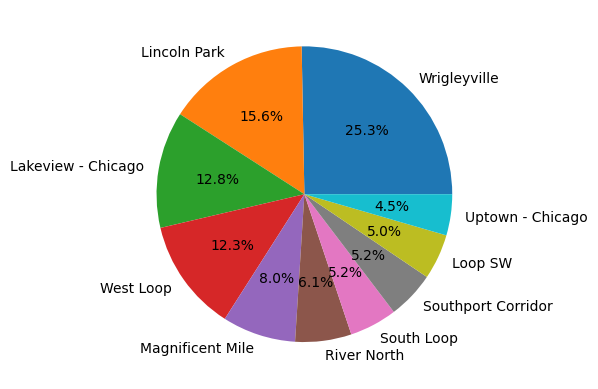

In [9]:
## pie Chart - Top 10 neighbourhoods
neighbourhood_names= df.reporting_neighborhood.value_counts().index
neighbourhood_values = df.reporting_neighborhood.value_counts().values
plt.pie(neighbourhood_values[:10], labels = neighbourhood_names[:10], autopct = '%1.1f%%')

Maximum facilities are located in Wrigleyville followed by Lincoln Park

Based on the dataset, and as part of my initial Data Analysis, I will try to find answers of few questions I am curious about

In [10]:
'''
Which facilities appear in most of the searches?
'''
popular_facilities = df.groupby(['searches', 'facility_id', 'reporting_neighborhood'], as_index=False)['facility_id'].max().sort_values(by = 'searches')
popular_facilities

,searches,reporting_neighborhood,facility_id
0,0,Pilsen,288
1,0,Lakeview - Chicago,497
2,0,Uptown - Chicago,586
3,0,Wilmette,625
4,0,Wrigleyville,671
...,...,...,...
689,363354,Loop NW,78
690,372873,Loop NE,259
691,389024,Loop NW,559
692,393525,Loop NW,373


Observation: From above cell I observe that facility_id 275 located in Loop NE is most searched one.
Whereas parking_id 288 in Pilsen appears the least.

In [11]:
'''
Which neighbourhood has most searched for parking?
'''
popular_facilities.groupby(['reporting_neighborhood'])['searches'].sum().reset_index().sort_values(by = 'searches')

,reporting_neighborhood,searches
52,Wilmette,0
3,Austin - Chicago,3
1,Auburn Gresham,4
8,Deerfield,11
2,"Aurora, IL",30
12,Grand Boulevard,35
41,South Shore,57
7,Cicero,76
14,Humboldt Park,108
34,Pilsen,200


Wrigleyville appears to have maximum searches and appears as happening neighborhood in Chicago

In [12]:
'''
Which facilities that have produced highest revenue in the past 4 week?
'''
highest_revenue_generating_facilities = df.groupby(['p4w_total_gross_revenue', 'facility_id', 'reporting_neighborhood'], as_index=False)['facility_id'].max().sort_values(by = 'p4w_total_gross_revenue')
highest_revenue_generating_facilities

,p4w_total_gross_revenue,reporting_neighborhood,facility_id
0,0.00,Wrigleyville,3
34,0.00,Evanston,362
35,0.00,Wrigleyville,363
36,0.00,South Loop,365
37,0.00,Lakeview - Chicago,411
...,...,...,...
689,133079.33,Loop NE,211
690,134652.00,River North,224
691,136086.00,Loop NW,373
692,145905.00,Magnificent Mile,337


Facility 275 in Loop NE has highest generated revenue in past 4 week.

In [13]:
'''
Which facilities have option to extend parking?
'''
df[df.ext_allowed== False]

,facility_id,reporting_neighborhood,city,latitude,longitude,height_restriction,ext_allowed,parking_type,accessible,ev_charging,heated,rooftop_exposed,has_monthly_rates,has_transient_rates,p4w_total_gross_revenue,p4w_new_drivers,p4w_repeat_drivers,num_words_parking_instruction,num_rentals_refunded,p4w_sipp,sipp,user_issues_per_park,tipp,product_cpp,total_cpp,p4w_lot_full,num_stalls,count_first_rentals,count_repeat,rental_count,p4w_return_pct,scan_to_pay_flag,iq_facility,p4w_total_gross_revenue_no_event,customer_reviews_count,covered_parking,inout_allowed,lot_fulls_per_park,utilization,utilization_weekday_day,utilization_weekend_night,has_event_rates,searches,on_site_staff,facility_type_under_el,facility_type_garage,facility_type_valet_stand,facility_type_lot,facility_type_personal_spot,refund_pct,average_star_rating
304,305,Streeterville,Chicago,41.891507,-87.61503,98.0,False,self,True,True,False,False,False,True,9240.0,374.0,98.0,87,17,6.154,310,483,34,207,1086,0,25,10100,5302,704,20.8%,False,False,9240.0,11345,True,False,17,0.5688,0.6271,0.9135,False,81488,True,0,1,0,0,0,2.41%,4.6


Observation: Facility 305 is the only one providing extensions

In [14]:
'''
Which facility is rented most?
'''
df.groupby(['facility_id', 'reporting_neighborhood'])['rental_count'].sum().reset_index().sort_values('rental_count')

,facility_id,reporting_neighborhood,rental_count
540,541,Wrigleyville,0
362,363,Wrigleyville,0
296,297,Lincoln Park,0
533,534,Uptown - Chicago,0
302,303,Lincoln Park,0
...,...,...,...
372,373,Loop NW,7495
223,224,River North,7575
274,275,Loop NE,7926
159,160,Loop SE,8943


Observation: Facility 211 in Loop NE is most rented with Facility 275 is at place 3

## 3.1. Descriptive Statistics

In [15]:
df.describe()

,facility_id,latitude,longitude,height_restriction,p4w_total_gross_revenue,p4w_new_drivers,p4w_repeat_drivers,num_words_parking_instruction,num_rentals_refunded,p4w_sipp,sipp,user_issues_per_park,tipp,product_cpp,total_cpp,p4w_lot_full,num_stalls,count_first_rentals,count_repeat,rental_count,p4w_total_gross_revenue_no_event,customer_reviews_count,lot_fulls_per_park,utilization,utilization_weekday_day,utilization_weekend_night,searches,facility_type_under_el,facility_type_garage,facility_type_valet_stand,facility_type_lot,facility_type_personal_spot,average_star_rating
count,694.000000,694.000000,694.000000,222.000000,694.000000,630.000000,630.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,630.000000,694.000000,694.000000,694.000000,684.000000,689.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,658.000000
mean,347.500000,41.919596,-87.655657,78.716216,8203.315072,254.507937,107.996825,65.906340,14.570605,18.351981,253.786744,170.717579,37.331412,163.621037,843.355908,0.409222,35.828530,4461.687320,2747.704611,468.982709,7791.544746,2747.092219,160.451009,0.291917,0.295209,0.550187,55603.256484,0.037464,0.273775,0.028818,0.445245,0.214697,4.623860
std,200.484829,0.046007,0.040309,7.180643,19373.215969,564.679350,308.678768,37.348383,29.084989,45.392610,289.410269,221.618579,104.021974,232.300924,531.760700,1.213073,112.083924,11105.116193,7114.283386,1158.927762,18931.025422,7551.871397,264.728732,0.201870,0.268407,0.305263,78933.018859,0.190033,0.446217,0.167417,0.497351,0.410908,0.343089
min,1.000000,41.738032,-87.888916,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,174.250000,41.887659,-87.660552,74.000000,342.687500,21.000000,2.000000,46.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,178.250000,74.250000,19.250000,233.312500,41.250000,0.000000,0.126125,0.064700,0.267100,3095.250000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000
50%,347.500000,41.916073,-87.651464,77.000000,986.925000,60.500000,10.000000,58.000000,4.500000,3.523500,178.000000,81.500000,0.000000,67.000000,1000.000000,0.000000,3.500000,610.500000,296.500000,73.000000,761.250000,177.000000,0.000000,0.268300,0.198900,0.627400,13384.500000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000
75%,520.750000,41.948133,-87.634252,81.750000,6940.330000,218.250000,68.000000,74.750000,15.000000,18.340500,453.500000,308.000000,17.000000,262.750000,1133.000000,0.000000,25.000000,3432.000000,1768.000000,360.000000,6533.937500,1729.000000,250.000000,0.442675,0.480300,0.827100,84778.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.800000
max,694.000000,42.162719,-87.573675,132.000000,153483.000000,4497.000000,2841.000000,517.000000,344.000000,500.000000,1000.000000,2000.000000,1000.000000,2000.000000,3500.000000,10.000000,1700.000000,90879.000000,69125.000000,9943.000000,144642.000000,65932.000000,1000.000000,0.893400,0.996700,1.000000,396328.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


## 4. Data Preparation

## 4.1. Data Cleaning
Let us check for the NAs in the rows, either drop them or fill them with the mean of the column.

<Axes: >

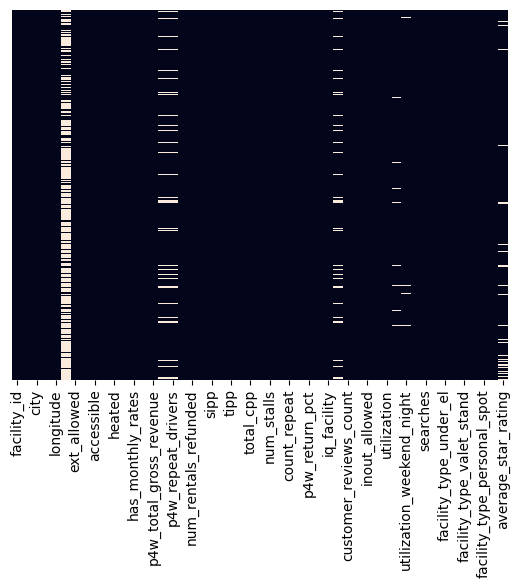

In [16]:
# heatmap of missing features to get idea of quantities missing in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar = False)

In [17]:
missing_features = [features for features in df.columns if df[features].isnull().sum()>1]
missing_features

['height_restriction',
 'p4w_new_drivers',
 'p4w_repeat_drivers',
 'p4w_total_gross_revenue_no_event',
 'utilization_weekday_day',
 'utilization_weekend_night',
 'average_star_rating']


Observation: From above I see that features that have missing data are numerical and I will handle them one by one


##### a. Handling Height Restriction

In [18]:
df[~df['height_restriction'].isnull()]

,facility_id,reporting_neighborhood,city,latitude,longitude,height_restriction,ext_allowed,parking_type,accessible,ev_charging,heated,rooftop_exposed,has_monthly_rates,has_transient_rates,p4w_total_gross_revenue,p4w_new_drivers,p4w_repeat_drivers,num_words_parking_instruction,num_rentals_refunded,p4w_sipp,sipp,user_issues_per_park,tipp,product_cpp,total_cpp,p4w_lot_full,num_stalls,count_first_rentals,count_repeat,rental_count,p4w_return_pct,scan_to_pay_flag,iq_facility,p4w_total_gross_revenue_no_event,customer_reviews_count,covered_parking,inout_allowed,lot_fulls_per_park,utilization,utilization_weekday_day,utilization_weekend_night,has_event_rates,searches,on_site_staff,facility_type_under_el,facility_type_garage,facility_type_valet_stand,facility_type_lot,facility_type_personal_spot,refund_pct,average_star_rating
3,4,South Loop,Chicago,41.871927,-87.633291,90.0,True,self,True,True,False,False,False,True,5421.00,87.0,115.0,63,10,3.263,214,500,71,143,1214,1,40,6155,5659,663,56.9%,False,False,4851.00,4320,True,False,71,0.4069,0.8046,0.2395,True,4056,True,0,1,0,0,0,1.51%,4.8
4,5,Near North,Chicago,41.898351,-87.637903,74.0,True,self,True,False,False,False,True,True,4338.00,91.0,69.0,35,17,34.591,417,167,0,167,1000,2,20,3309,3015,305,43.1%,False,False,4338.00,1775,False,True,83,0.2931,0.9863,0.2254,False,20114,False,0,0,0,1,0,5.57%,4.8
5,6,Loop SW,Chicago,41.877228,-87.632770,80.0,True,valet,True,False,False,False,False,True,15555.75,266.0,246.0,42,15,0.000,200,600,0,100,1000,0,45,11526,10130,1242,48.0%,False,True,15555.75,22201,True,False,0,0.2313,0.7690,0.0000,False,118113,True,0,1,0,0,0,1.21%,4.9
6,7,West Loop,Chicago,41.880883,-87.640606,84.0,True,self,False,False,False,False,True,True,114523.00,603.0,1879.0,49,40,0.460,88,730,36,219,1197,0,500,79243,69125,7253,75.7%,False,True,114450.75,65932,True,False,7,0.2096,0.7155,0.0276,True,74411,True,0,1,0,0,0,0.55%,4.8
9,10,River North,Chicago,41.891143,-87.640262,78.0,True,self,True,False,False,False,True,True,7879.00,104.0,160.0,48,10,18.391,63,313,0,188,1063,0,90,10886,9273,477,60.6%,False,False,7879.00,12362,True,False,0,0.1093,0.3630,0.1002,False,25980,False,0,1,0,0,0,2.10%,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,644,Wrigleyville,Chicago,41.948400,-87.652025,70.0,True,self,True,False,False,False,False,False,1364.00,24.0,2.0,53,2,31.250,0,200,0,600,1000,0,1,142,40,28,7.7%,False,False,0.00,48,True,False,0,0.1063,0.0706,0.1891,True,141174,False,0,1,0,0,0,7.14%,4.5
652,653,ORD,Chicago,41.983079,-87.838174,82.0,True,self,True,False,False,False,True,True,21241.00,187.0,100.0,70,9,25.510,220,260,20,340,1080,0,500,5291,1392,361,34.8%,False,False,21241.00,1225,True,False,20,0.1520,0.1249,0.1994,False,1397,False,0,1,0,0,0,2.49%,4.4
668,669,Wrigleyville,Chicago,41.949776,-87.654028,73.0,True,self,False,False,True,False,False,False,885.00,11.0,0.0,134,1,66.667,167,0,0,667,1167,0,2,80,19,14,0.0%,False,False,0.00,36,True,True,0,0.0557,0.0416,0.1111,True,144338,False,0,0,0,0,1,7.14%,4.3
673,674,South Loop,Chicago,41.858370,-87.626402,74.0,True,valet,True,False,False,False,False,False,23634.61,415.0,15.0,47,24,6.452,477,273,45,136,1136,0,10,1438,322,407,3.5%,False,False,0.00,164,False,False,455,0.2233,0.0000,0.2475,True,1176,True,0,0,0,1,0,5.90%,4.3


I see that 222 facilities have no restriction on height


Let's see the max height in restricted ones

In [19]:
# max allowed restricted height in data
df[~df['height_restriction'].isnull()]['height_restriction'].max()

132.0

Maximum height restriction observed is 132. From search on web about allowed height in Chicago, we come to know that 15 feet is maximum height. So we fill the missing values in the column with 15*12 i.e 180

In [20]:
df['height_restriction']= df.height_restriction.fillna(180)

##### b. Handling 'p4w_new_drivers' and 'p4w_repeat_drivers'

In [21]:
no_revenue_df = df[(df['p4w_new_drivers'].isnull()) & (df['p4w_repeat_drivers'].isnull())]
no_revenue_df[['facility_id','reporting_neighborhood', 'p4w_total_gross_revenue','p4w_new_drivers','p4w_repeat_drivers']]

,facility_id,reporting_neighborhood,p4w_total_gross_revenue,p4w_new_drivers,p4w_repeat_drivers
2,3,Wrigleyville,0.0,NaN,NaN
16,17,West Loop,0.0,NaN,NaN
49,50,West Loop,0.0,NaN,NaN
74,75,Deerfield,0.0,NaN,NaN
75,76,Loop SE,0.0,NaN,NaN
113,114,Magnificent Mile,0.0,NaN,NaN
116,117,West Loop,0.0,NaN,NaN
120,121,Lakeview - Chicago,0.0,NaN,NaN
128,129,Southport Corridor,0.0,NaN,NaN
155,156,West Town,0.0,NaN,NaN


In [22]:
no_revenue_df.shape == df[df.p4w_total_gross_revenue==0.0].shape

True

I see from above two dataframe that there are some parking facilities that do not generate any revenue and values of p4w_new_drivers and p4w_repeat_drivers is empty. 
Hence I conclude that 'p4w_new_drivers' and 'p4w_repeat_drivers' are 0. This dataframe can be observed and the features of this particular dataset and get some idea about quality

In [23]:
df[['p4w_new_drivers', 'p4w_repeat_drivers']] =df[['p4w_new_drivers', 'p4w_repeat_drivers']].fillna(0)

##### c. Handling 'p4w_total_gross_revenue_no_event'

In [24]:
df[df.p4w_total_gross_revenue < df.p4w_total_gross_revenue_no_event][['p4w_total_gross_revenue', 'p4w_total_gross_revenue_no_event']]

,p4w_total_gross_revenue,p4w_total_gross_revenue_no_event


In [25]:
df[df.p4w_total_gross_revenue==0][['p4w_total_gross_revenue', 'p4w_total_gross_revenue_no_event']]

,p4w_total_gross_revenue,p4w_total_gross_revenue_no_event
2,0.0,NaN
16,0.0,NaN
49,0.0,NaN
74,0.0,NaN
75,0.0,NaN
113,0.0,NaN
116,0.0,NaN
120,0.0,NaN
128,0.0,NaN
155,0.0,NaN


Above two cells are indicative that there exists a correlation between p4w_total_gross_revenue_no_event and p4w_total_gross_revenue. 
i.e p4w_total_gross_revenue = p4w_total_gross_revenue_no_event + p4w_total_gross_revenue_with_event. Hence we can fill p4w_total_gross_revenue_no_event with 0.0 as p4w_total_gross_revenue is 0.0

In [26]:
df['p4w_total_gross_revenue_no_event'] = df['p4w_total_gross_revenue_no_event'].fillna(0.0)

##### d. Handling 'utilization_weekday_day ' and utilization_weekend_night

In [27]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [28]:
check_normality(df.utilization_weekday_day)

p value:1.0000
Fail to reject null hypothesis >> The data is normally distributed


In [29]:
check_normality(df.utilization_weekend_night)

p value:1.0000
Fail to reject null hypothesis >> The data is normally distributed


/var/folders/9f/c0g9p4cx4_9_l4ww1d6qyt200000gn/T/ipykernel_98639/3225539079.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.utilization_weekday_day, kde= True )


<Axes: xlabel='utilization_weekday_day', ylabel='Density'>

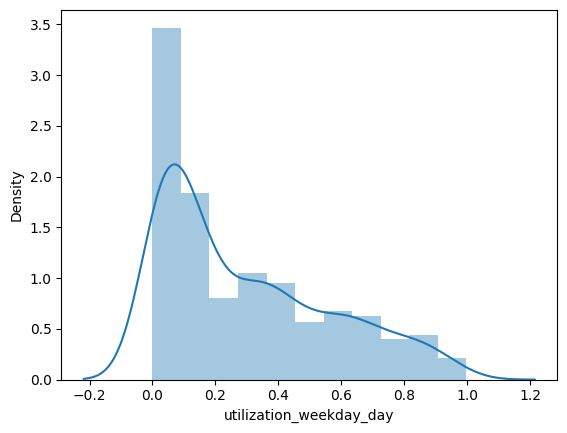

In [30]:
sns.distplot(df.utilization_weekday_day, kde= True )

We observe that the variables are not normal(skewed) hence we impute the missing values with median

In [31]:
df['utilization_weekend_night'].fillna(df.utilization_weekend_night.median(), inplace = True)
df['utilization_weekday_day'].fillna(df.utilization_weekday_day.median(), inplace = True)

##### e.Handiling Average Star rating

My intution says that customer ratings can play a major role in deciding the quality of parking. 
Datatype of the column is numerical then replace the values with Mean in case of Normal distribution and Median imputatation in case of Skewed distribution. 

Let's check the normality of data with hypothesis testing.
Assumptions of Hypothesis testing are:

1. Observations in each sample are independent and identically distributed (iid).
2. Observations in each sample are normally distributed.
3. Observations in each sample have the same variance.

Let,

H0: The data is normally distributed.

H1: The data is not normally distributed.

Assume that alpha=0.05 If p-value is >0.05, it can be said that data is normally distributed.

In [32]:
check_normality(df[~df['average_star_rating'].isnull()].average_star_rating)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed


Hence, 

Hypothesis test cannot be applied and assumption to impute ratings with 5 cannot be tested with Hypothesis tests.

I decide to impute with KNNs. Though this can be of computationally high cost on large datasets, 
but for small dataset in hand at moment, I chose to impute with knns

In [33]:
def impute_ratings(df):
    
    # Numeric columns to be considered in the data
    num_col = [feature for feature in df.columns if df[feature].dtype in(['int64', 'float64'])][3:]
    
    # Remaining features
    features_to_be_concatenated_later = list(set(df.columns).difference(set(num_col)))
    
    # Filtering on numeric columns
    df_filtered = df.filter(num_col, axis =1).copy()
    
    # Scaling the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    transformed_data = scaler.fit_transform(df_filtered)
    df_knn = pd.DataFrame(transformed_data, columns = df_filtered.columns)
    
    # Define KNN imputer and fill missing values
    knn_imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
    df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

    #Transforming the features back to scale
    df_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_imputed), columns = df_filtered.columns)
    
    # Concating the imputed dataframe with remaining dataframe
    df_new = pd.concat([df[features_to_be_concatenated_later],df_imputed], axis=1)
    
    # Rounding the ratings
    df_new['average_star_rating'] = df_new['average_star_rating'].round(decimals =0)
    
    # Rearranging the columns
    df_new = df_new[df.columns]
    
    return df_new
    


In [34]:
df_new = impute_ratings(df)

In [35]:
df_new.average_star_rating.value_counts()

5.0    527
4.0    158
3.0      6
2.0      2
1.0      1
Name: average_star_rating, dtype: int64

Most of the missing ratings are filled with 5 and 4. 

When dealing with large dataset, I will prefer running 2-3 POCs on similar smaller sub-sets and following theory of large numbers, I shall conclude then if missing values are to be computed with knns or can be randomly given 5 and 4 values

In [36]:
# for easy coding, I rename df_new with df
df = df_new.copy()

## 4.2. Data Transformation
This will include dropping of columns if required, rounding of columns


The data is striclty based on Chicago city. Hence this column can be dropped

Also Latitude and logitude information in the data if we had  extra features describing the location of point of interest near where the facility is associated. Distance could have been calculated between two points and would have become an interesting feature to consider.

Hence in this case we opt to drop this informarion

In [37]:
df.drop(columns = ['city','latitude', 'longitude'], inplace = True)

In [38]:
# Rounding off average ratings
df['average_star_rating'] = df['average_star_rating'].round(decimals =0)
df['average_star_rating'].value_counts()


#Handling columns with % sign
df['refund_pct'] = df['refund_pct'].str.rstrip('%').astype('float') / 100.0
df['p4w_return_pct'] = df['p4w_return_pct'].str.rstrip('%').astype('float') / 100.0

Data dictionary mention feature rental_count as 'Total number of rentals'. So my understanding about this column is the number of times the facility was rented.

Also we have columns; 

count_first_rentals: Number of rentals from first time users. 

count_repeat: Number of rentals in which a driver returned to the facility

Hence rental_count >= count_first_rentals+ count_repeat


In [39]:
df[df.reporting_neighborhood== 'Auburn Gresham'][['count_first_rentals', 'count_repeat','rental_count']]

,count_first_rentals,count_repeat,rental_count
586,14.0,5.0,0.0


So filtering the data on the neighbourhood Auburn Gresham, I see that rental_count is 0, that is the place has never been rented.

But there are columns like count_repeat and count_first_rentals whose values are 5 and 14 respectively that implies the place was rented. 

This contradicts the definitions of the data columns. Hence I would prefer replacing rental_count as sum of other two columns. But before doing this I will see if three features are statistically dependent

In [40]:
#define predictor and response variables
X = df[['count_first_rentals',
  'count_repeat']]
y= df[['rental_count']]

#add constant to predictor variables
x= sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rental_count   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     4097.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:55:53   Log-Likelihood:                -4994.4
No. Observations:                 694   AIC:                             9995.
Df Residuals:                     691   BIC:                         1.001e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.6688     13.252      1.635      0.102      -4.351      47.689
count_first_rentals     0.1021      0.006     17.754      0.000       0.091       0.113
count_repeat           -0.0030      0.009     -0.332      0.740      -0.021       0.015
==============================================================================
Omnibus:                      402.855   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16644.823
Skew:                           1.931   Prob(JB):                         0.00
Kurtosis:                      26.679   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
#define predictor and response variables
X = df[['count_first_rentals']]
y= df[['count_repeat']]

#add constant to predictor variables
x= sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           count_repeat   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.797e+04
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:55:54   Log-Likelihood:                -5996.6
No. Observations:                 694   AIC:                         1.200e+04
Df Residuals:                     692   BIC:                         1.201e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -57.1105     56.082     -1.018      0.309    -167.221      53.000
count_first_rentals     0.6286      0.005    134.070      0.000       0.619       0.638
==============================================================================
Omnibus:                      621.058   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144512.007
Skew:                           3.184   Prob(JB):                         0.00
Kurtosis:                      73.406   Cond. No.                     1.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From above two experiments I see that three features are dependent. hence I replace rental_count as sum of other two and drop count_first_rentals and count_repeat 

In [42]:
df['rental_count'] = df.count_first_rentals + df.count_repeat
df.drop(columns = ['count_first_rentals', 'count_repeat'], inplace = True)

There are some columns that give us information about past 4 weeks, and there are columns which tell us the same thing but we don't know the timeline of it. e.g
'p4w_lot_full', 'lot_fulls_per_park'
'p4w_sipp', 'sipp'.

So from above instances I keep data of past 4 weeks and remove redundant features.

Then they are some columns which have the same meaning and the units are different. One of them defines percentage.

'refund_pct' ,   'num_rentals_refunded'
'p4w_return_pct', 'p4w_repeat_drivers'.

From above instances I keep data in pct.

Also I will drop column 'p4w_total_gross_revenue_no_event' as data lacks description about events.

In [43]:
df.drop(columns = ['lot_fulls_per_park','sipp','num_rentals_refunded', 'p4w_repeat_drivers','p4w_total_gross_revenue_no_event'], inplace=True)

<Axes: xlabel='utilization', ylabel='utilization_weekend_night'>

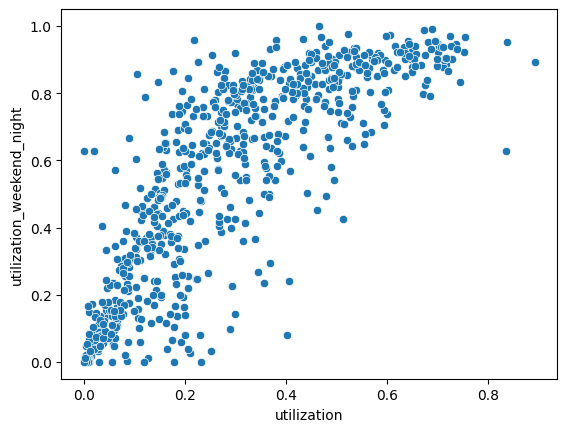

In [44]:
sns.scatterplot(data = df, y= 'utilization_weekend_night', x = 'utilization')

<Axes: xlabel='utilization', ylabel='utilization_weekday_day'>

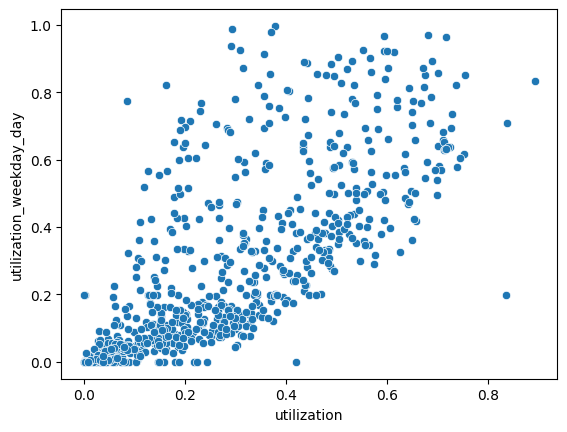

In [45]:
sns.scatterplot(data = df, y= 'utilization_weekday_day', x = 'utilization')

In [46]:
# Because of correlation with utilization and no further data about weekday and weekends
df.drop(columns = ['utilization_weekday_day', 'utilization_weekend_night'], inplace = True)

In [47]:
# converting columns with dtype int64 to float64
for col in set(num_col).intersection(set(df.columns)):
    if df[col].dtype==np.int64:
        df[col]=df[col].astype(np.float64)

## 4.3 Categorical Data Transformation

In [49]:
#changing type of columns 
df.parking_type=df.parking_type.map({'self':0, 'valet':1, 'self-valet-assist':2})

for col in cat_col:
    df[col] = df[col].astype('category').cat.codes

In [50]:
# Label encoding reporting neighborhoods with sklearns preprocessing 
le = preprocessing.LabelEncoder()

# Fitting data to label encoder object
le.fit(df.reporting_neighborhood)

#Storing transformed data
df.reporting_neighborhood=le.transform(df.reporting_neighborhood)
#le.inverse_transform([19])

In [51]:
df.head()

,facility_id,reporting_neighborhood,height_restriction,ext_allowed,parking_type,accessible,ev_charging,heated,rooftop_exposed,has_monthly_rates,has_transient_rates,p4w_total_gross_revenue,p4w_new_drivers,num_words_parking_instruction,p4w_sipp,user_issues_per_park,tipp,product_cpp,total_cpp,p4w_lot_full,num_stalls,rental_count,p4w_return_pct,scan_to_pay_flag,iq_facility,p4w_total_gross_revenue_no_event,customer_reviews_count,covered_parking,inout_allowed,utilization,has_event_rates,searches,on_site_staff,facility_type_under_el,facility_type_garage,facility_type_valet_stand,facility_type_lot,facility_type_personal_spot,refund_pct,average_star_rating
0,1,45,180.0,1,0,1,0,0,0,0,1,90.0,5.0,55.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.167,0,0,0.0,4.0,0,1,0.0225,1,1002.0,0,0,0,0,1,0,0.1429,4
1,2,19,180.0,1,0,0,0,0,0,0,1,263.5,13.0,74.0,0.000,0.0,0.0,0.0,1000.0,0.0,1.0,2.0,0.133,0,1,263.5,14.0,0,1,0.2022,0,1675.0,0,0,0,0,1,0,0.0625,3
2,3,53,180.0,1,0,1,0,0,0,0,1,0.0,0.0,56.0,0.000,0.0,0.0,0.0,1000.0,0.0,1.0,2.0,0.000,0,0,0.0,13.0,0,1,0.0421,1,18988.0,0,0,0,0,0,1,0.0000,3
3,4,40,90.0,1,0,1,1,0,0,0,1,5421.0,87.0,63.0,3.263,500.0,71.0,143.0,1214.0,1.0,40.0,11814.0,0.569,0,0,4851.0,4320.0,1,0,0.4069,1,4056.0,1,0,1,0,0,0,0.0151,4
4,5,28,74.0,1,0,1,0,0,0,1,1,4338.0,91.0,35.0,34.591,167.0,0.0,167.0,1000.0,2.0,20.0,6324.0,0.431,0,0,4338.0,1775.0,0,1,0.2931,0,20114.0,0,0,0,0,1,0,0.0557,4
